In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("G:/datasets/loan_prediction_train.csv")
test = pd.read_csv("G:/datasets/loan_prediction_test.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

## Univariate Analysis

In [6]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
#Normalize can be set to true to to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

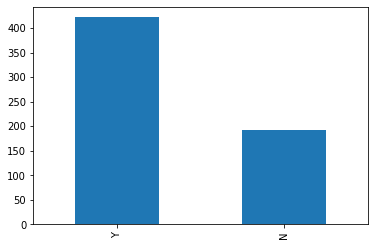

In [8]:
#Plot a graph for to see the values in loan status
train['Loan_Status'].value_counts().plot.bar()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Independent Variable (Categorical)

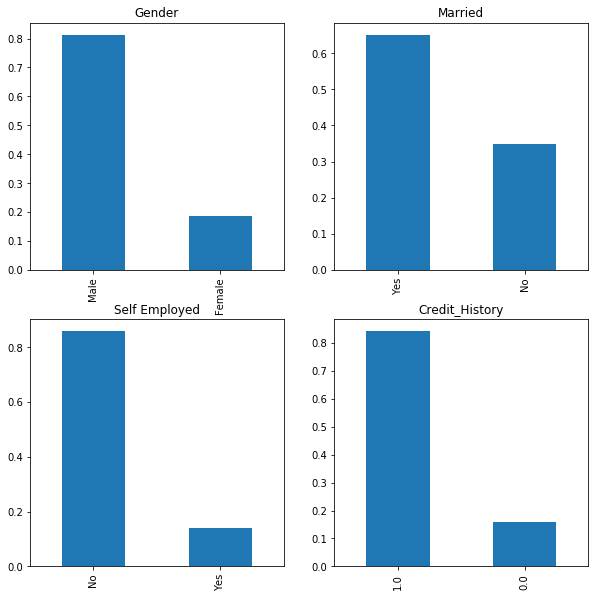

In [10]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10), title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,10), title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,10), title='Self Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,10), title='Credit_History')

plt.show()

Around 80% applicants in the dataset are Male           
Around 65% applicants are married                
Around 15% applicants are self employed                          
Around 85% applicants have repaid their debt                      

## Independent Variable (Ordinal)

[]

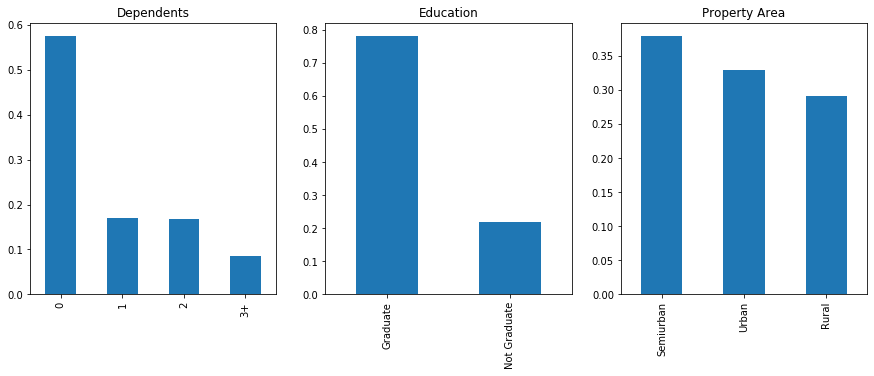

In [11]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='Property Area')

plt.plot()

Most of the applicants do not have dependents      
Around 80% of applicants are Graduate        
Most of the applicant are from Semi-urban area

## Independent Variable (Numerical)

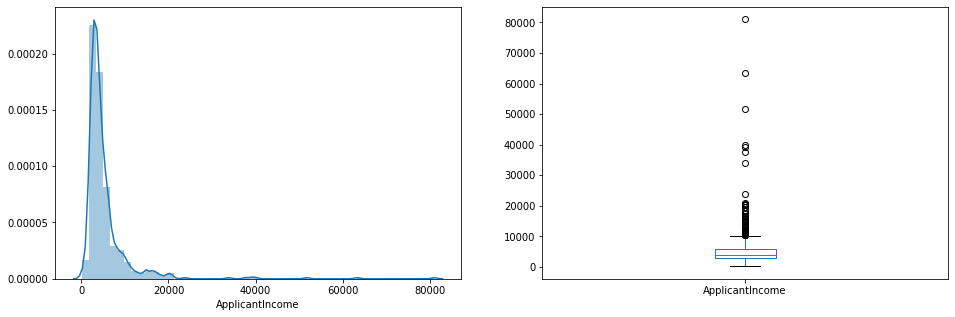

In [12]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Most of the data in the distribution of applicant income is towards left which means it is not normally distributed.  
The boxplot confirms the presence of a lot of outliers.

Text(0.5, 0.98, ' ')

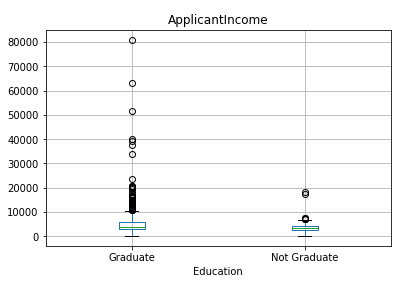

In [13]:
train.boxplot(column= 'ApplicantIncome', by= 'Education')
plt.suptitle(" ")

We can see that their are higher number of graduates with very high income values, which are appearing to be the outlier.

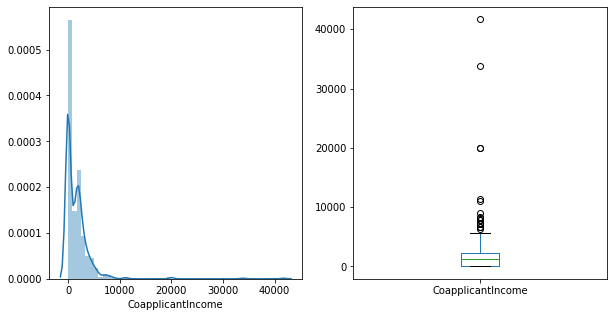

In [14]:
#let's lok at Coapplicant Income distribution
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,5))

plt.show()

We can see outliers in coapplicant income and it is not normally distributed

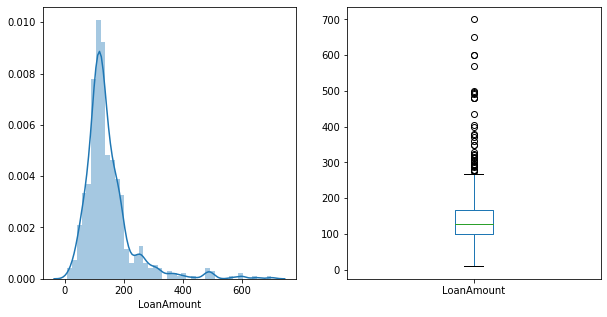

In [15]:
#Let's look at distribution of loan amount
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(10,5))

plt.show()

We can see a lot of outliers in this variable and the distribution is fairly normal

## Bivariate Analysis 

Categorical Independent Variable vs Target Variable

In [16]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [17]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


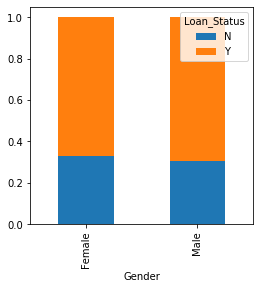

In [18]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

The proportion of male and female applicants are nearly same for both approved and not approved

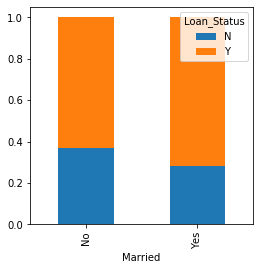

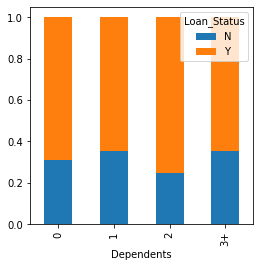

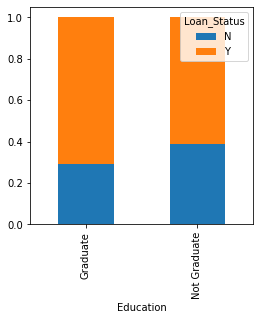

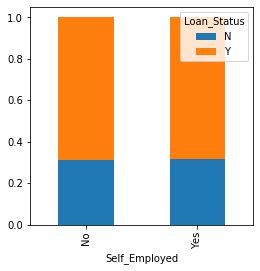

In [19]:
#Now let's visualize the remaining categorical variable vs target variable

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants are higher for approved loans  
Distribution of applicants with 1 or 3+ is similar across both the categories of loan status     
Their is nothing significant we can infer from Self Employed vs Loan Status plot      
Proportion of Graduates getting loan is higher

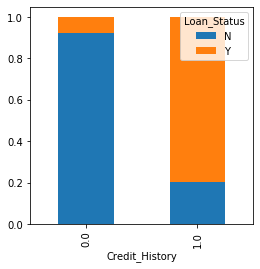

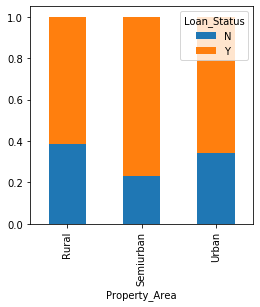

In [20]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

People with credit history as 1 are more likely to get their loans approved   
Proportion of loans getting approved in semiurban area is higher than that of rural and urban

## Numerical Independent Variables vs Target Variable

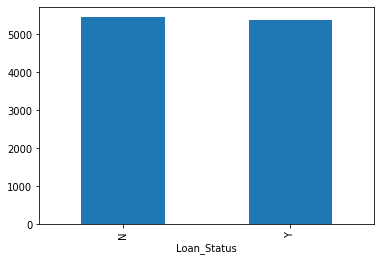

In [21]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

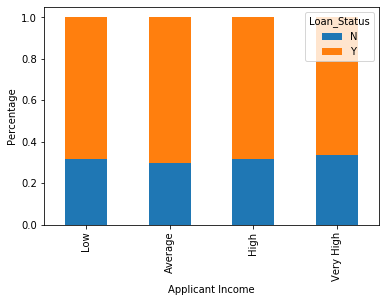

In [22]:
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

We can see that Applcant Income does not affect the chances of loan approval.

Text(0, 0.5, 'Percentage')

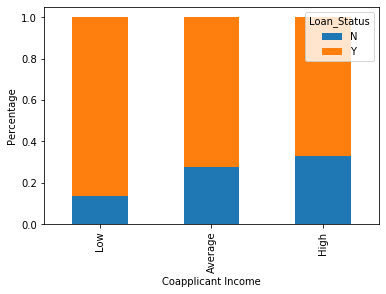

In [23]:
# CoapplicantIncoms vs Loan Status

bins = [0,1000,3000,42000] 
group = ['Low', 'Average', 'High']

train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

It shows that is coapplicant income is less chances og getting the loan approved is high. But it is not correct. May be most of the applicant do not have coapplicant income and coapplicant income for such applicant is 0 and hence loan approval is not dependent on it.

Lets combine the applicant income and coapplicant income to see combined effect of total income on loan status

Text(0, 0.5, 'Percentage')

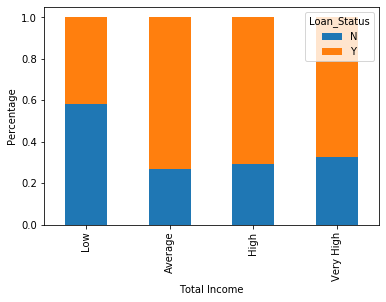

In [24]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']

train['Total_Income_Bin'] = pd.cut(train['Total_Income'], bins, labels= group)

Total_Income_Bin = pd.crosstab(train['Total_Income_Bin'], train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

We see that proportion of loan getting approved for low total income is very less as compared to that of applicant with Average, High and Very high Income

Text(0, 0.5, 'Percentage')

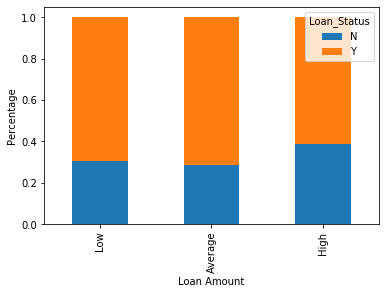

In [25]:
# lets visualize for loan amount

bins=[0,100,200,700]
group = ['Low','Average','High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

We can see that the proportion of loan approval is higher for low and average loan amount as compared to high loan amount

In [26]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_Bin', 'Total_Income'], axis =1)

In [27]:
train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

lets look at correlation between all numerical variables

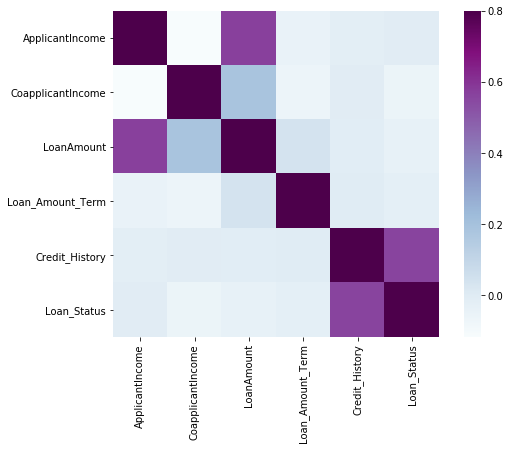

In [28]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu')

## Missing Value and Outlier treatment

In [29]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [31]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [34]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [37]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outlier Treatment

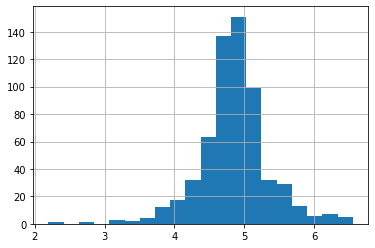

In [38]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Model Building

In [39]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis = 1)

In [40]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [42]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [48]:
x_train.shape, x_cv.shape

((429, 21), (185, 21))

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
pred_cv = model.predict(x_cv)

In [51]:
accuracy_score(y_cv, pred_cv)

0.7675675675675676

In [52]:
pred_test = model.predict(test)

In [54]:
pred_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [55]:
submission = pd.read_csv("G:/datasets/loan_prediction_sample_submission.csv")

In [57]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [58]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [59]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [60]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')